<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

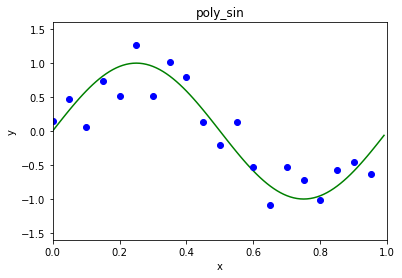

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [0.00451213]


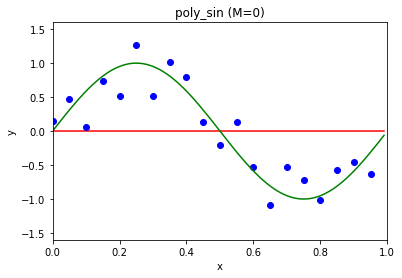

MSE= 0.44235811497605965
AIC= -14.312710201467397
W
 [ 0.81440338 -1.70503421]


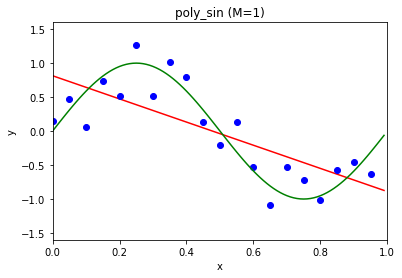

MSE= 0.20070196434907822
AIC= -28.118684714771256
W
 [ 0.56049057 -0.01228217 -1.78184425]


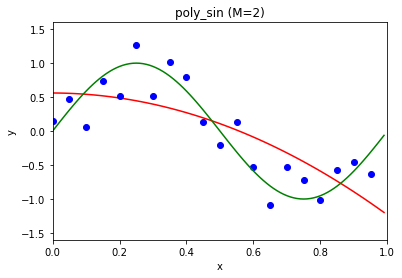

MSE= 0.18328329096988502
AIC= -27.93444570059443
W
 [ -0.06123619   9.01740621 -26.16328612  17.10978377]


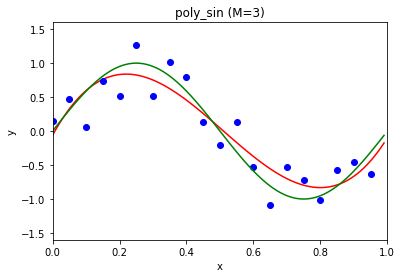

MSE= 0.08235896082572952
AIC= -41.93336028730731
W
 [ 1.21520868e-02  7.00882172e+00 -1.60746064e+01  3.21614904e-01
  8.83587835e+00]


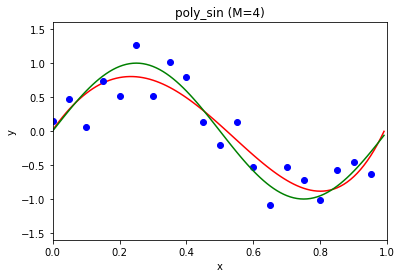

MSE= 0.08071838251970866
AIC= -40.335778825955
W
 [ 2.34979677e-01 -3.82322830e+00  7.18549081e+01 -2.55083108e+02
  3.14677668e+02 -1.28775490e+02]


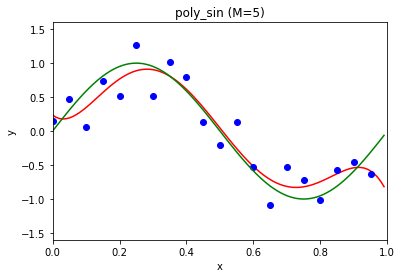

MSE= 0.060094043788375094
AIC= -44.23689094741838
W
 [   0.22025957   -2.56523615   56.66542041 -187.68809377  178.66729383
   -1.77846185  -44.56036091]


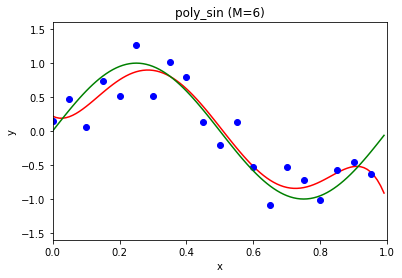

MSE= 0.05995260814467788
AIC= -42.2840178624507
W
 [ 2.11072685e-01 -1.14728909e+00  3.26627401e+01 -3.74021457e+01
 -2.70469157e+02  6.89307659e+02 -5.72956189e+02  1.58916039e+02]


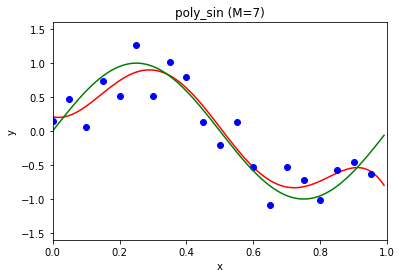

MSE= 0.05985344606432447
AIC= -40.31712540568877
W
 [ 1.75475990e-01  9.39681765e+00 -2.05465723e+02  1.95176854e+03
 -8.42889487e+03  1.89111118e+04 -2.31751065e+04  1.47831583e+04
 -3.84848494e+03]


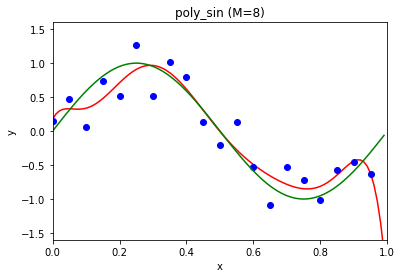

MSE= 0.0567883038960539
AIC= -39.36849783563818
W
 [ 1.69403471e-01  1.31865359e+01 -3.14461578e+02  3.11317991e+03
 -1.46289039e+04  3.75793981e+04 -5.63167811e+04  4.91697965e+04
 -2.31268221e+04  4.50955552e+03]


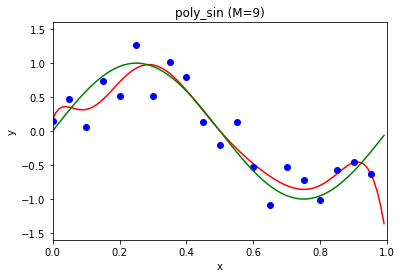

MSE= 0.05657785564838751
AIC= -37.44275226579695
AIC[9]=-37.442752


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)
    print('AIC=', AIC[M])

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [-14.3127102  -28.11868471 -27.9344457  -41.93336029 -40.33577883
 -44.23689095 -42.28401786 -40.31712541 -39.36849784 -37.44275227]
The best order of the model is 5


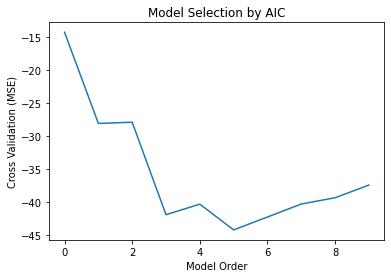

In [5]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))
                                                       
                                                       
plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
